In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
#to create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [103]:
df=pd.read_csv('samsung_electronics_2019-2024(USD).csv')

In [104]:
#making date as index
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index=df['Date']

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1262 entries, 2019-01-14 to 2024-01-12
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1262 non-null   datetime64[ns]
 1   Open       1262 non-null   float64       
 2   High       1262 non-null   float64       
 3   Low        1262 non-null   float64       
 4   Close      1262 non-null   float64       
 5   Adj Close  1262 non-null   float64       
 6   Volume     1262 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.9 KB


In [106]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-14,2019-01-14,892.0,898.0,889.0,897.5,794.913147,9761
2019-01-15,2019-01-15,912.0,915.0,902.5,904.5,801.112976,15069
2019-01-16,2019-01-16,920.0,928.0,916.5,922.0,816.612732,16040
2019-01-17,2019-01-17,927.0,935.0,926.5,931.5,825.026978,14312
2019-01-18,2019-01-18,942.0,958.5,939.0,950.0,841.412415,15475


In [107]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-01-08,2024-01-08,1444.0,1459.0,1439.0,1459.0,1459.0,5333
2024-01-09,2024-01-09,1419.0,1419.0,1395.0,1406.0,1406.0,12446
2024-01-10,2024-01-10,1392.0,1392.0,1375.0,1387.0,1387.0,28229
2024-01-11,2024-01-11,1384.0,1394.0,1369.0,1370.0,1370.0,12844
2024-01-12,2024-01-12,1384.0,1404.0,1380.0,1398.0,1398.0,9295


In [108]:
#Getting no of rows and columns
df.isnull()
df.isnull().sum().sum()
df.dropna(inplace=True)
df.shape

(1262, 7)

Text(0, 0.5, 'Stock Price ($)')

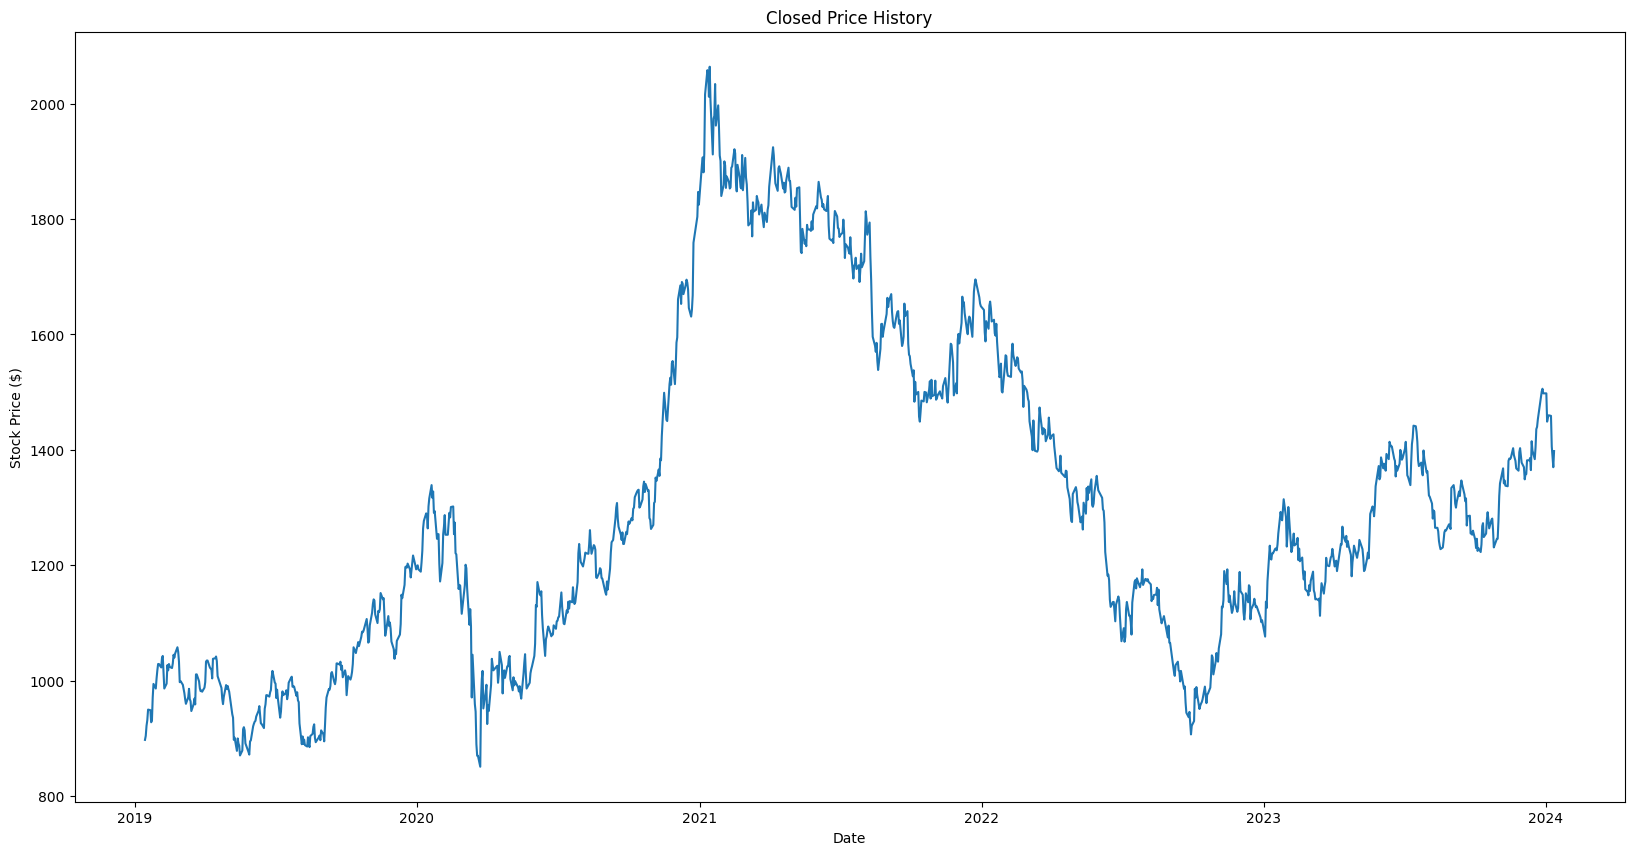

In [110]:
#Visualizing the data
plt.figure(figsize=(20,10))
plt.title('Closed Price History') #currency used is KRW South Korean Won
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')

In [164]:
#creating a new dataframe with close column
data=df.filter(['Close'])

#converting into numpuy array
dataset=data.values

#Alloting 70% data into training set
training_size=math.ceil(len(dataset)*0.75)
testing_size=len(dataset)-training_size

In [165]:
training_size, testing_size

(947, 315)

In [166]:
train_data,test_data=dataset[0:training_size,:],dataset[training_size:len(dataset),:1]

In [167]:
train_data

array([[ 897.5     ],
       [ 904.5     ],
       [ 922.      ],
       [ 931.5     ],
       [ 950.      ],
       [ 949.      ],
       [ 928.      ],
       [ 931.      ],
       [ 971.      ],
       [ 994.5     ],
       [ 986.5     ],
       [1004.      ],
       [1018.      ],
       [1029.      ],
       [1029.      ],
       [1023.      ],
       [1039.      ],
       [1043.      ],
       [1014.      ],
       [ 986.5     ],
       [ 995.      ],
       [1027.      ],
       [1018.      ],
       [1029.      ],
       [1024.      ],
       [1022.      ],
       [1030.      ],
       [1045.      ],
       [1040.      ],
       [1047.      ],
       [1058.      ],
       [1050.      ],
       [1033.      ],
       [ 997.5     ],
       [ 999.5     ],
       [ 993.      ],
       [ 986.      ],
       [ 978.5     ],
       [ 968.      ],
       [ 960.      ],
       [ 971.5     ],
       [ 986.      ],
       [ 968.      ],
       [ 964.5     ],
       [ 947.5     ],
       [ 9

In [168]:
test_data

array([[ 963.      ],
       [ 967.799988],
       [ 989.799988],
       [ 975.200012],
       [ 961.200012],
       [ 976.      ],
       [ 977.799988],
       [ 988.      ],
       [1011.      ],
       [1044.      ],
       [1040.5     ],
       [1011.      ],
       [1033.5     ],
       [1048.      ],
       [1037.      ],
       [1033.      ],
       [1056.      ],
       [1080.5     ],
       [1128.5     ],
       [1127.      ],
       [1139.5     ],
       [1190.      ],
       [1167.5     ],
       [1193.      ],
       [1160.5     ],
       [1136.5     ],
       [1147.5     ],
       [1117.5     ],
       [1122.      ],
       [1133.5     ],
       [1155.      ],
       [1135.      ],
       [1119.5     ],
       [1126.      ],
       [1163.      ],
       [1188.5     ],
       [1155.5     ],
       [1149.      ],
       [1119.      ],
       [1106.      ],
       [1122.5     ],
       [1151.5     ],
       [1136.      ],
       [1165.5     ],
       [1163.      ],
       [11

In [169]:
#Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [170]:
#creation of training dataset
train_data = scaled_data[0:training_size]

In [171]:
#dividing data into x_train and y_train dataset
x_train, y_train=[], []
for i in range(120, len(train_data)):
    x_train.append(train_data[i-120:i,0])
    y_train.append(train_data[i,0])

In [172]:
#converting x_train and y_train into arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [173]:
#reshaping the data into 3D model for LSTM
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(827, 120, 1)

In [184]:
#building LSTM model
model=Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(60))
model.add(Dense(1))

In [185]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [186]:
#Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

827/827 [==============================] - 20s 21ms/step - loss: 0.0048


In [177]:
#creating test data
test_data=scaled_data[training_size-120:,:]

#creating x_test and y_test
x_test, y_test=[], dataset[training_size:, :]

for i in range(120, len(test_data)):
    x_test.append(test_data[i-120:i,0])

In [178]:
#converting test dat into array
x_test=np.array(x_test)

In [179]:
#reshaping test_data for LSTM
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [180]:
#Model for predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

10/10 [==============================] - 1s 19ms/step


In [181]:
#Getting root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

49.84353666825397

C:\Users\paras\AppData\Local\Temp\ipykernel_29324\1516917710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


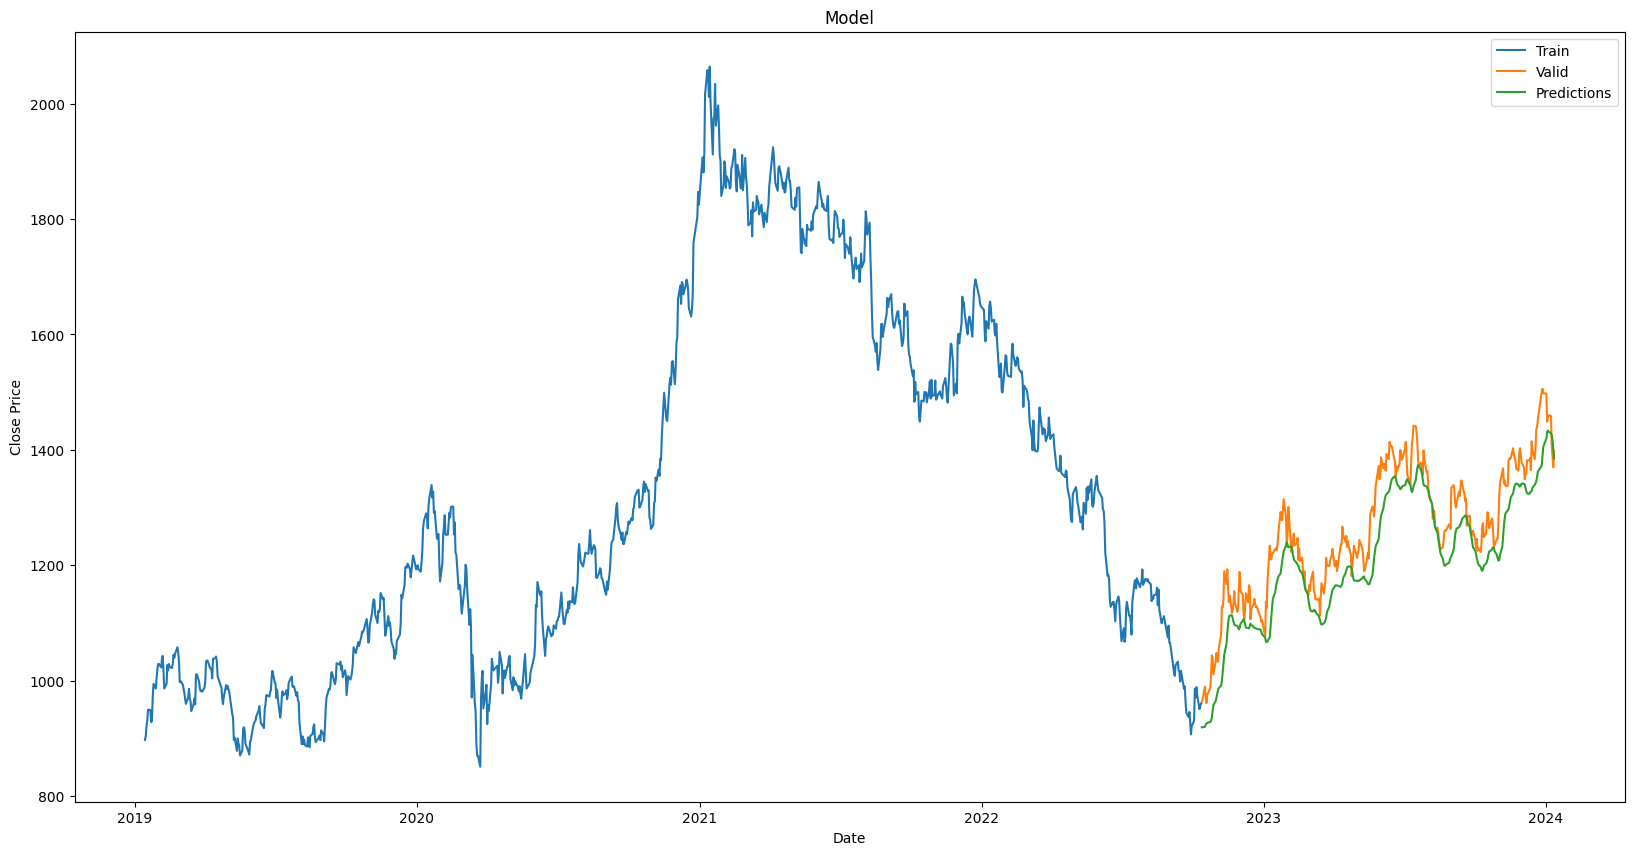

In [182]:
#Plotting the data
train=data[:training_size]
valid=data[training_size:]
valid['Predictions']=predictions

#Visualization
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid','Predictions'], loc='upper right')

In [183]:
#predicted values
valid

,Close,Predictions
Date,,
2022-10-13,963.000000,919.339539
2022-10-14,967.799988,919.498840
2022-10-17,989.799988,920.108215
2022-10-18,975.200012,923.434753
2022-10-19,961.200012,926.112976
...,...,...
2024-01-08,1459.000000,1428.859863
2024-01-09,1406.000000,1425.528198
2024-01-10,1387.000000,1415.744751
